In [4]:
### ML part 1 , project


Mean Absolute Error (MAE): 2.7341306998343784
Mean Squared Error (MSE): 10.705683511276508
Root Mean Squared Error (RMSE): 3.2719540814743273


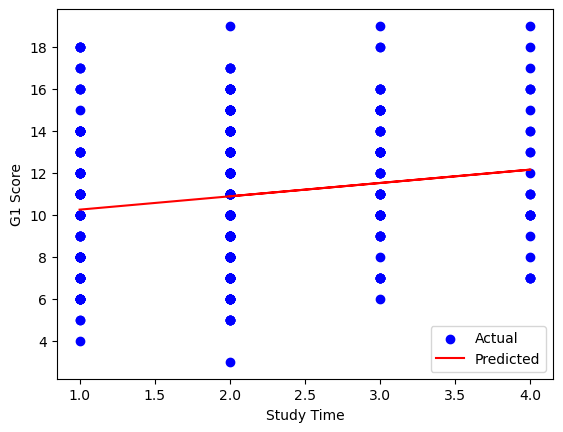

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load dataset
data = pd.read_csv("student_data.csv")

# Features and target
X = data[['studytime']]
y = data['G1']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
predicted_score = model.predict(X)

# Error metrics
mae = mean_absolute_error(y, predicted_score)
mse = mean_squared_error(y, predicted_score)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Optional: plot
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, predicted_score, color="red", label="Predicted")
plt.xlabel("Study Time")
plt.ylabel("G1 Score")
plt.legend()
plt.show()



In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE Employee(
    id INTEGER,
    name TEXT,
    position TEXT,
    salary REAL
)
""")

data = [
    (1, "Aditi", "Manager", 70000),
    (2, "nikita", "Developer", 50000),
    (3, "Ram", "Developer", None),   
    (4, None, "HR", 45000),             
    (2, "Krrish", "Developer", 50000),    
]
cursor.executemany("INSERT INTO Employee VALUES (?, ?, ?, ?)", data)
conn.commit()

df = pd.read_sql("SELECT * FROM Employee", conn)

print("Raw DataFrame:")
print(df)

df_cleaned = df.drop_duplicates()

print("\nDataFrame without duplicates:")
print(df_cleaned)


Raw DataFrame:
   id    name   position   salary
0   1   Aditi    Manager  70000.0
1   2  nikita  Developer  50000.0
2   3     Ram  Developer      NaN
3   4    None         HR  45000.0
4   2  Krrish  Developer  50000.0

DataFrame without duplicates:
   id    name   position   salary
0   1   Aditi    Manager  70000.0
1   2  nikita  Developer  50000.0
2   3     Ram  Developer      NaN
3   4    None         HR  45000.0
4   2  Krrish  Developer  50000.0


In [4]:

df = pd.read_sql("SELECT * FROM Employee", conn)

print("Raw DataFrame:")
print(df)

df_no_dupes = df.drop_duplicates()

df_dropna = df_no_dupes.dropna()

df_filled = df_no_dupes.fillna({"name": "Unknown", "salary": 0})

print("\nWithout duplicates:")
print(df_no_dupes)

print("\nDrop rows with NULL values:")
print(df_dropna)

print("\nFill missing values:")
print(df_filled)


Raw DataFrame:
   id    name   position   salary
0   1   Aditi    Manager  70000.0
1   2  nikita  Developer  50000.0
2   3     Ram  Developer      NaN
3   4    None         HR  45000.0
4   2  Krrish  Developer  50000.0

Without duplicates:
   id    name   position   salary
0   1   Aditi    Manager  70000.0
1   2  nikita  Developer  50000.0
2   3     Ram  Developer      NaN
3   4    None         HR  45000.0
4   2  Krrish  Developer  50000.0

Drop rows with NULL values:
   id    name   position   salary
0   1   Aditi    Manager  70000.0
1   2  nikita  Developer  50000.0
4   2  Krrish  Developer  50000.0

Fill missing values:
   id     name   position   salary
0   1    Aditi    Manager  70000.0
1   2   nikita  Developer  50000.0
2   3      Ram  Developer      0.0
3   4  Unknown         HR  45000.0
4   2   Krrish  Developer  50000.0


In [6]:

df_sqlite = pd.read_sql("SELECT * FROM Employee", conn)

df_mysql = pd.DataFrame({
    "id": [5, 6],
    "name": ["Diya", "Riya"],
    "position": ["Tester", "Designer"],
    "salary": [40000, 55000]
})

print("SQLite DataFrame:")
print(df_sqlite)

print("\nMySQL DataFrame:")
print(df_mysql)

df_merged = pd.concat([df_sqlite, df_mysql], ignore_index=True)

print("\nMerged DataFrame:")
print(df_merged)


SQLite DataFrame:
   id    name   position   salary
0   1   Aditi    Manager  70000.0
1   2  nikita  Developer  50000.0
2   3     Ram  Developer      NaN
3   4    None         HR  45000.0
4   2  Krrish  Developer  50000.0

MySQL DataFrame:
   id  name  position  salary
0   5  Diya    Tester   40000
1   6  Riya  Designer   55000

Merged DataFrame:
   id    name   position   salary
0   1   Aditi    Manager  70000.0
1   2  nikita  Developer  50000.0
2   3     Ram  Developer      NaN
3   4    None         HR  45000.0
4   2  Krrish  Developer  50000.0
5   5    Diya     Tester  40000.0
6   6    Riya   Designer  55000.0
